# Programming Assignment 1
#### Drew Rosales

## 1. Data Analysis

In [195]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.stats import f
from scipy.stats import chi2

First, let's look the dataset into a pandas dataframe and view the contents

In [196]:
iris_df = pd.read_csv("iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### a) Perform test statistics for each feature and class: minimum, maximum, mean, trimmed mean, alpha trimmed mean, standard deviation, skewness, and kurtosis

In [197]:
def create_test_statistics(x, p, alpha):
    n = len(x)
    x = list(sorted(x))
    minimum = np.min(x)
    maximum = np.max(x)
    mu = np.mean(x, axis=0) # column-wise mean
    mu_trim = np.mean(x[p:-p], axis=0)
    mu_alpha = np.mean(x[int(np.floor(n*alpha)) :-int(np.floor(n*alpha))], axis=0) 
    sigma = np.std(x, axis=0)
    skewness = skew(x, axis=0)
    kurt = kurtosis(x, axis=0)
    return (minimum, maximum, mu, mu_trim, mu_alpha, sigma, skewness, kurt)
    

Separate per class into `setosa`, `virginica` and `versicolor` for each of the features

In [198]:
iris_table = [[iris_df[feature].loc[iris_df["species"] == class_name] for class_name in ["setosa", "versicolor", "virginica"]] for feature in ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
iris_table[3][2]

100    2.5
101    1.9
102    2.1
103    1.8
104    2.2
105    2.1
106    1.7
107    1.8
108    1.8
109    2.5
110    2.0
111    1.9
112    2.1
113    2.0
114    2.4
115    2.3
116    1.8
117    2.2
118    2.3
119    1.5
120    2.3
121    2.0
122    2.0
123    1.8
124    2.1
125    1.8
126    1.8
127    1.8
128    2.1
129    1.6
130    1.9
131    2.0
132    2.2
133    1.5
134    1.4
135    2.3
136    2.4
137    1.8
138    1.8
139    2.1
140    2.4
141    2.3
142    1.9
143    2.3
144    2.5
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, dtype: float64

`iris_table` is indexed first by `feature` such as `sepal_length`, it is then indexed by `class` like `setosa`. Above we see, `iris_table[3][2]` this notates `petal_width` for the `virginica` class

Each test statistic is represented as a tuple in the following format: `(minimum, maximum, mean, trimmed mean, alpha trimmed mean, standard deviation, skewness, kurtosis)`. A tuple is placed in a list in the following order for the features of the three species: `[sepal_length, sepal_width, petal_length, petal_width]`.

In [199]:
iris_stats = [[create_test_statistics(class_vector.values, 5, 0.2) for class_vector in feature_vector] for feature_vector in iris_table]
iris_stats[0]

[(np.float64(4.3),
  np.float64(5.8),
  np.float64(5.006),
  np.float64(5.0024999999999995),
  np.float64(4.999999999999999),
  np.float64(0.3489469873777391),
  np.float64(0.11645392749203061),
  np.float64(-0.34576467558246327)),
 (np.float64(4.9),
  np.float64(7.0),
  np.float64(5.935999999999999),
  np.float64(5.9375),
  np.float64(5.910000000000001),
  np.float64(0.5109833656783751),
  np.float64(0.10218956951841443),
  np.float64(-0.5988273407672811)),
 (np.float64(4.9),
  np.float64(7.9),
  np.float64(6.587999999999999),
  np.float64(6.572500000000001),
  np.float64(6.546666666666668),
  np.float64(0.6294886813914926),
  np.float64(0.11444474247296789),
  np.float64(-0.08794223159166314))]

Here we trimmed the first and last values since `p=5` and also first and last 5% since `alpha=0.02`. Above we see `iris_stats[0]` which represents the test statistics for `sepal_length` under all three classes

### b) Create Analysis and an explanation for each test statistic. What conclusions can you make based on this data?

The first two values in statistics are `minimum` and `maximum`, which indicate the smallest and largest values in the vector respectively. For `sepal_length` above we can see that `setosa` has the smallest range with `[4.3, 5.8]` while `versicolor` and `virginica` have the similar range of `[4.9, 7.0]` and `[4.9, 7.9]` respectively. Next we can look at the next three statistics: `mean`, `trimmed mean`, and `alpha trimmed mean`. These show the average values within the features but `trimmed mean` will disregard the smallest and largest `p` values in the feature. Similarly, `alpha trimmed mean` will take a percentage off the extremes of the feature vector. Given our features are `50 x 1` then `n=50`. With a value of `alpha=0.05`, 20% of 50 yields 10 observations trimmed off the front and back. The differences in these variants of means can be an indicator of how centered our observations are relative to the mean. If there is a particular large value and/or outlier then the mean may be skewed to the left. Similarly, if there is a small value/outlier then the observation may be skewed right. My trimming the mean we expect to get closer to the median of the feature, which is more resilient to outliers. Within the `sepal_length` feature for the `setosa` class we can see the mean holds at `5.006` while the trimmed mean (5 values off either side) yields `5.002`. This gives us an indicator that the trimmed values do not skew the overal feature vector since there is only a difference in the order of `10^-3`. We can see that the `alpha trimmed mean` for this feature and class also holds a similar results but to a lesser magnitude, `10^-1`. With this information we might conclude that the `sepal_length` for `setosa` is not significantly skewed if not skewed at all. Next, `standard deviation` is proportional to variance, which will show us the distribution of values away from the mean. For the first class, `setosa`, we have a `standard deviation` of `0.349`. `versicolor` and `virginica` have a `standard deviation` of `0.511` and `0.629`. This would indicate that would we anticipate a larger distance from the mean when looking at these two classes versus `setosa`.

## 2. Data Processing

### a) Feature visualization

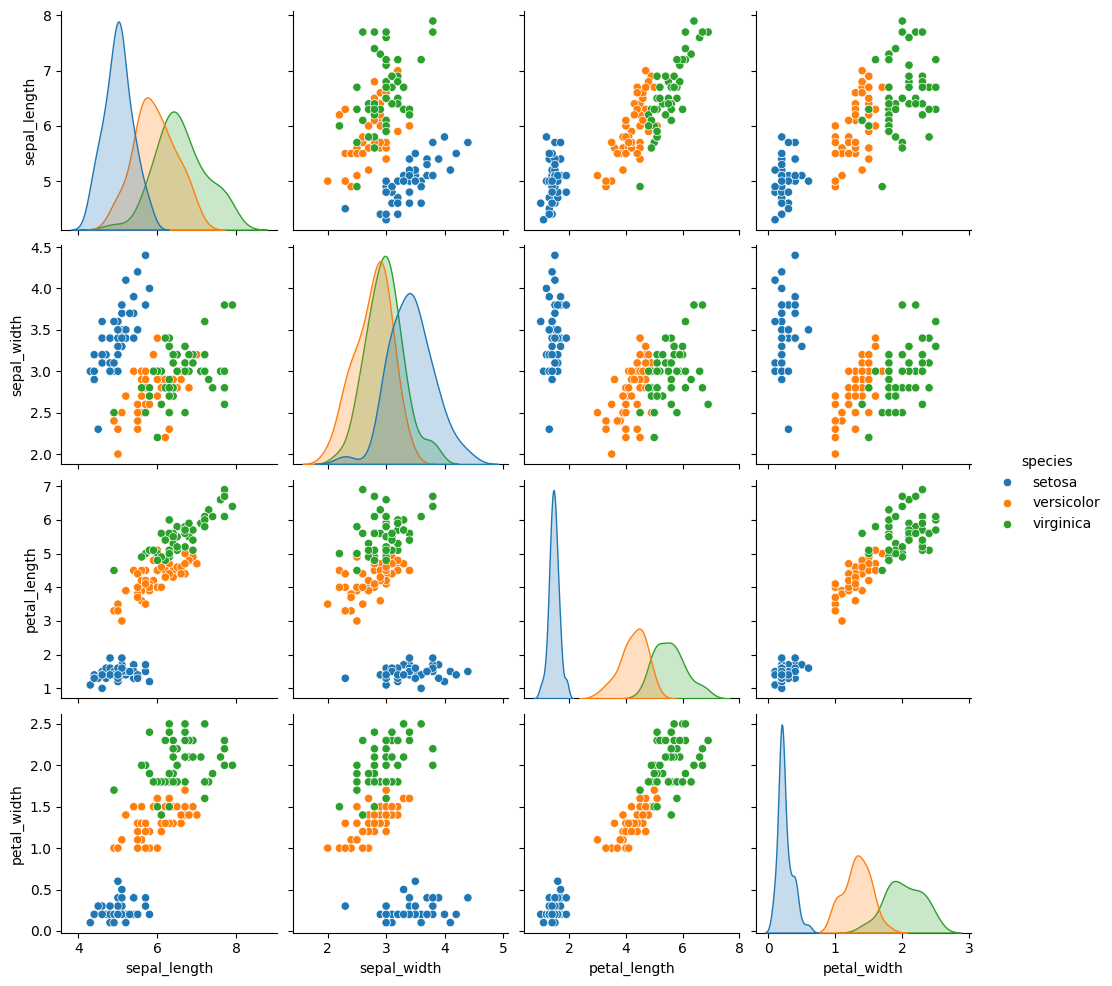

In [200]:
seaborn_df = sns.load_dataset("iris")
sns.pairplot(seaborn_df, hue="species")

Let's recreate one of these for our future analysis. Let's look at ploting a scatterplot comparing `sepal_length` and `petal_length` for each of the three species.

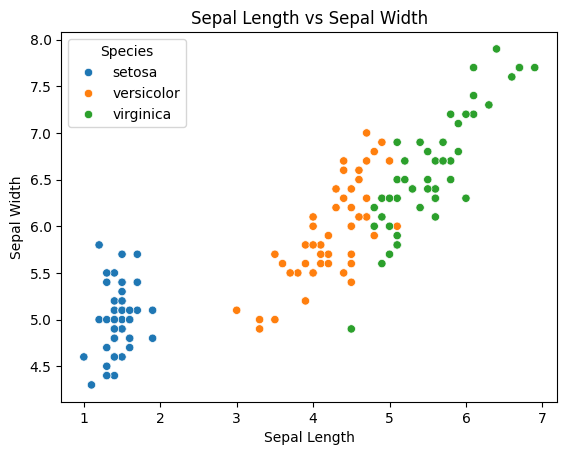

In [201]:
plt.figure()
sns.scatterplot(data=seaborn_df, x="petal_length", y="sepal_length", hue="species")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Species')
plt.show()

This looks appropriate and matches what we see in the pairplot generated by seaborn

---

### b) sorting

TODO

---

### c) Data Normalization

In [202]:
def normalize_min_max(df, a=0, b=1):
    # df: df.DataFrame -> dataset

    min_xk = np.min(df.values, axis=0)
    max_xk = np.max(df.values, axis=0)

    # Min-max normalization
    xhat = (df.values - min_xk) / (max_xk - min_xk) * (b-a) + a

    normalized_df = pd.DataFrame(data=xhat, columns=df.columns)
    return normalized_df

Remove the `species` column to do the normalization then add it back later

In [203]:
removed_species = iris_df.pop("species")
norm_iris = normalize_min_max(iris_df)

Add the species column back to the original dataframe

In [204]:
iris_df["species"] = removed_species

Let's double check to make sure that the minimum and maximum match our desired normalization

In [205]:
np.min(norm_iris.values)

np.float64(0.0)

In [206]:
np.max(norm_iris)

np.float64(1.0)

Have this be our new dataframe part of the data pipeline

In [207]:

norm_iris["species"] = removed_species
iris_df = norm_iris

---

#### d) Outlier Removal

For outlier removal, we can create an implementation of Wilk's Outlier removal which relies on the squared mahalanobis distance and the chi squared distribution


$$ {malanobis}^2 = (x_i - \mu)\Sigma^{-1}(x_i - \mu)^T $$

The selection of outliers are dependent on the chi squared distribution. The tolerance is created based on the size of the input matrix `(n x p)`



#### i. Psuedocode:
```
function outlier_removal(dataframe, alpha):
    n := dataframe.rows
    p := dataframe.columns
    # compute the mean and inverse covariance to use in the mahalanobis
    mean = compute_mean(dataframe)
    covariance = compute_covariance(dataframe)
    inverse_covariance := inverse(covariance)
    #compute the mahalanobis distance for all the observations
    mahalanobis_distance : = compute_mahalanobis(dataframe, mean, inverse_covariance)
    # find the f-distribution tolerance based on the number of observations and features
    f_threshold := find_tolerance(alpha, n, p)
    if mahalanobis_distance > f_threshold
        remove_outliers
```

#### ii. Complexity:

Assuming the following:
* Computation of the mean, covariance, and inverse covariance are based on the rows and columns: $\Theta(n \cdot p)$
* Look up of the size of the input matrix `n` and `p` are constant: $\Theta(1)$
* Look up for the tolerance value in the distribution is also constant: $\Theta(1)$
* Calculating the mahalanobis distance is $\Theta(n /cdot p)$
* Determining the outliers are based on applying the tolerance condition for the number of observations, rows in the input, `n`: $\Theta(n)$
* Removal of the outliers is also $\Theta(n)$

Given the following, the algorithm is `T(1 + 1 + 3np + np + 2n)` and the worse case is `O(np)`

#### iii. Implementation

In [208]:
def outlier_removal(df, alpha=0.05):
    # x: feature vector
    # df: pd.DataFrame.values -> dataset data
    # alpha: sensitivity for outliers
    data = deepcopy(df.values)
    n = data.shape[0]
    p = data.shape[1]

    mu = np.mean(data, axis=0, keepdims=True)
    #rowvar change since observation are in the rows
    cov = np.cov(data, rowvar=False) 
    inv_cov = np.linalg.inv(cov)
    # compute the squared malanobis distance, cap the minimum to only positive values
    malanobis_dist = np.sqrt(np.maximum((data - mu) @ inv_cov @ (data - mu).T,0)).diagonal()

    threshold = chi2.ppf((1 - alpha), p)
    outliers = malanobis_dist > np.sqrt(threshold)
    outliers_removed = data[~outliers]
    return pd.DataFrame(data=outliers_removed, columns=df.columns)

In [209]:
from std_dev_ellipse_plots import sigma_ellipse_plot

In [210]:
def plot_helper(iris_df, target_class):
    feature1 = 'sepal_length'
    feature2 = 'sepal_width'

    setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target=target_class, feature1=feature1, feature2=feature2)
    setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
    setosa_plot_labels = setosa_ellipses_obj.get_labels()

    plt.figure(figsize=(30,20))

    plt.subplot(2,3,1)
    colors_for_plot = ['g', 'b', 'r']
    for i in range(0, len(setosa_ellipses)):
        plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

    # Plot all data points
    plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label=f'{target_class} raw data')

    # Plot mean
    plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = f'{target_class} mean')

    plt.xlabel('Sepal Length', fontsize=10)
    plt.ylabel('Sepal Width', fontsize=10)
    plt.title('Sepal Length v. Petal Width')
    plt.legend()

    #####

    feature1 = 'sepal_length'
    feature2 = 'petal_length'

    setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target=target_class, feature1=feature1, feature2=feature2)
    setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
    setosa_plot_labels = setosa_ellipses_obj.get_labels()

    plt.subplot(2,3,2)
    colors_for_plot = ['g', 'b', 'r']
    for i in range(0, len(setosa_ellipses)):
        plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

    # Plot all data points
    plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label=f'{target_class} raw data')

    # Plot mean
    plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = f'{target_class} mean')

    plt.xlabel('Sepal Length', fontsize=10)
    plt.ylabel('Petal Length', fontsize=10)
    plt.title('Sepal Length v. Petal Length')
    plt.legend()

    ##
    feature1 = 'sepal_length'
    feature2 = 'petal_width'

    setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target=target_class, feature1=feature1, feature2=feature2)
    setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
    setosa_plot_labels = setosa_ellipses_obj.get_labels()

    plt.subplot(2,3,3)
    colors_for_plot = ['g', 'b', 'r']
    for i in range(0, len(setosa_ellipses)):
        plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

    # Plot all data points
    plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label=f'{target_class} raw data')

    # Plot mean
    plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = f'{target_class} mean')

    plt.xlabel('Sepal Length', fontsize=10)
    plt.ylabel('Petal Width', fontsize=10)
    plt.title('Sepal Length v. Petal Width')
    plt.legend()

    ##
    feature1 = 'sepal_width'
    feature2 = 'petal_length'

    setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target=target_class, feature1=feature1, feature2=feature2)
    setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
    setosa_plot_labels = setosa_ellipses_obj.get_labels()

    plt.subplot(2,3,4)
    colors_for_plot = ['g', 'b', 'r']
    for i in range(0, len(setosa_ellipses)):
        plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

    # Plot all data points
    plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label=f'{target_class} raw data')

    # Plot mean
    plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = f'{target_class} mean')

    plt.xlabel('Sepal Width', fontsize=10)
    plt.ylabel('Petal Length', fontsize=10)
    plt.title('Sepal Length v. Petal Width')
    plt.legend()

    ##
    feature1 = 'sepal_width'
    feature2 = 'petal_width'

    setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target=target_class, feature1=feature1, feature2=feature2)
    setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
    setosa_plot_labels = setosa_ellipses_obj.get_labels()

    plt.subplot(2,3,5)
    colors_for_plot = ['g', 'b', 'r']
    for i in range(0, len(setosa_ellipses)):
        plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

    # Plot all data points
    plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label=f'{target_class} raw data')

    # Plot mean
    plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = f'{target_class} mean')

    plt.xlabel('Sepal Width', fontsize=10)
    plt.ylabel('Petal Width', fontsize=10)
    plt.title('Sepal Width v. Petal Width')
    plt.legend()

    ##
    feature1 = 'petal_length'
    feature2 = 'petal_width'

    setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target=target_class, feature1=feature1, feature2=feature2)
    setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
    setosa_plot_labels = setosa_ellipses_obj.get_labels()

    plt.subplot(2,3,6)
    colors_for_plot = ['g', 'b', 'r']
    for i in range(0, len(setosa_ellipses)):
        plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

    # Plot all data points
    plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label=f'{target_class} raw data')

    # Plot mean
    plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = f'{target_class} mean')

    plt.xlabel('Petal Length', fontsize=10)
    plt.ylabel('Petal Width', fontsize=10)
    plt.title('Petal Length v. Petal Width')
    plt.legend()
    ####
    plt.show()

#### iv. Plotting

#### Setosa Visualization

/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X = self.mean[0]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_Y = self.mean[1]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X =

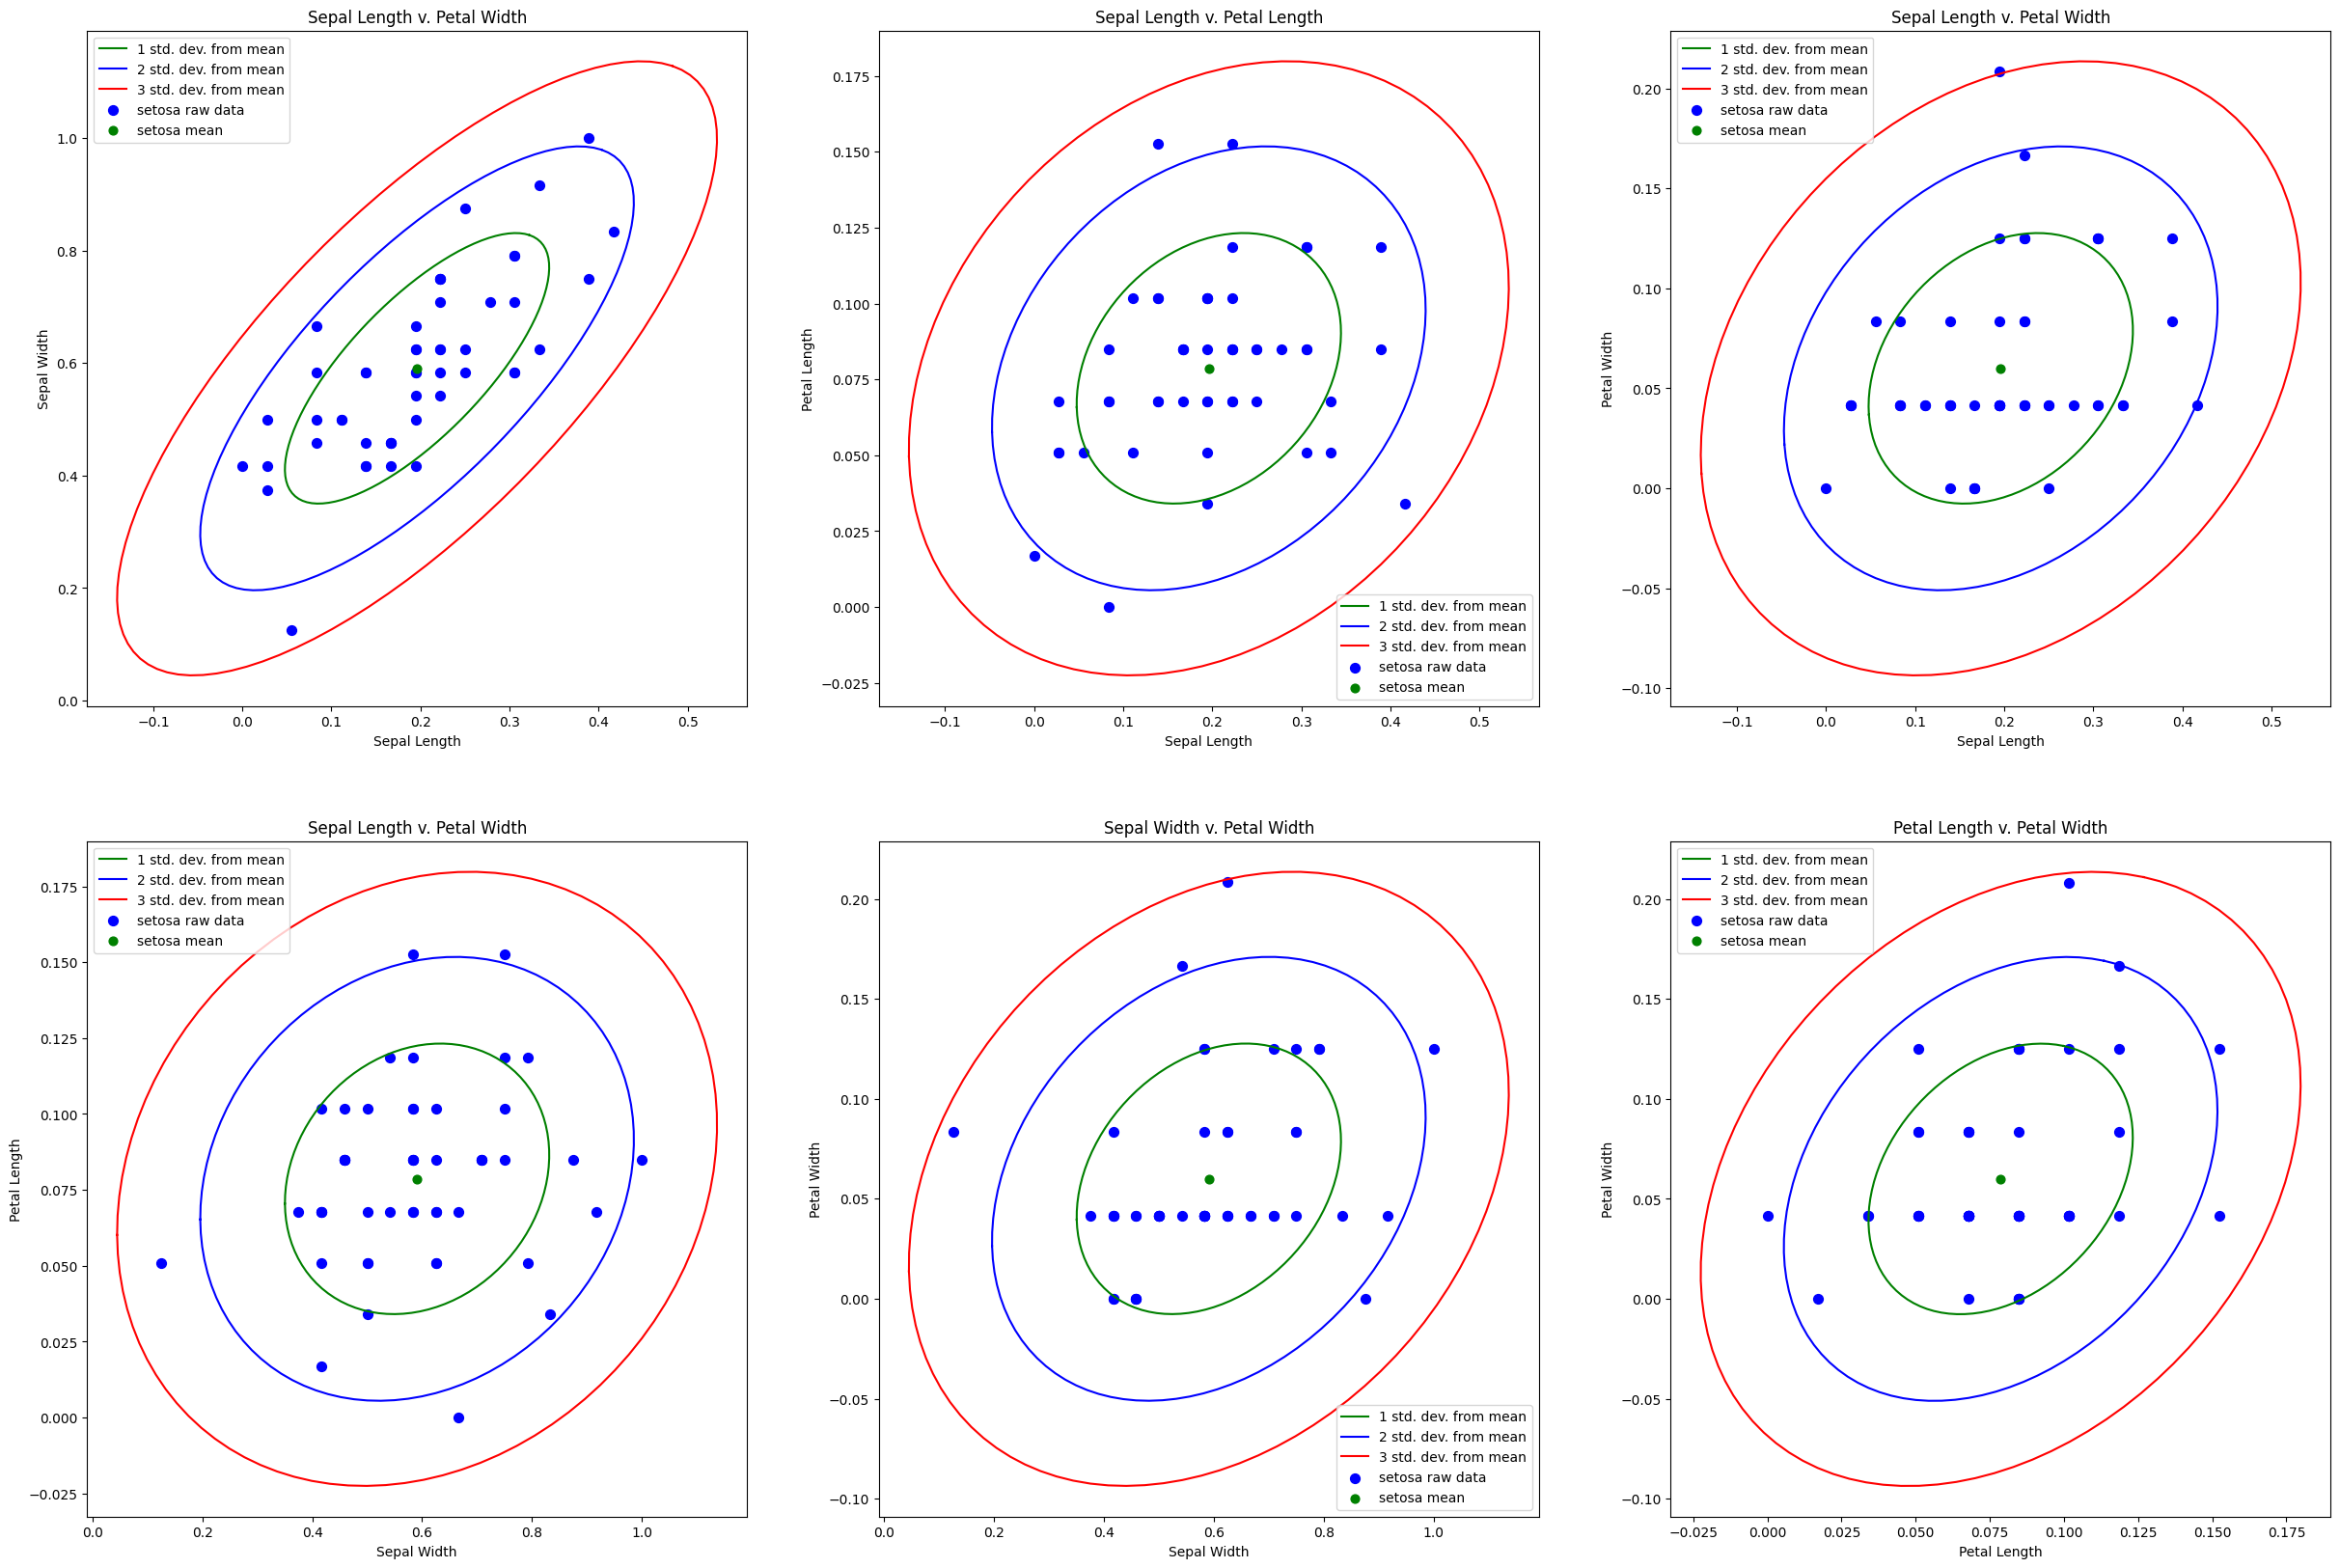

In [211]:
plot_helper(iris_df,"setosa")

I would say there is definitely an outlier in the `Sepal Length vs. Petal Width` and the `Sepal Width v. Petal Width` plots. There is also likely outliers in the outer rings of the `Sepal Length vs. Petal Width` and `Sepal Length v. Petal Width`

#### Versicolor Visualization

/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X = self.mean[0]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_Y = self.mean[1]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X =

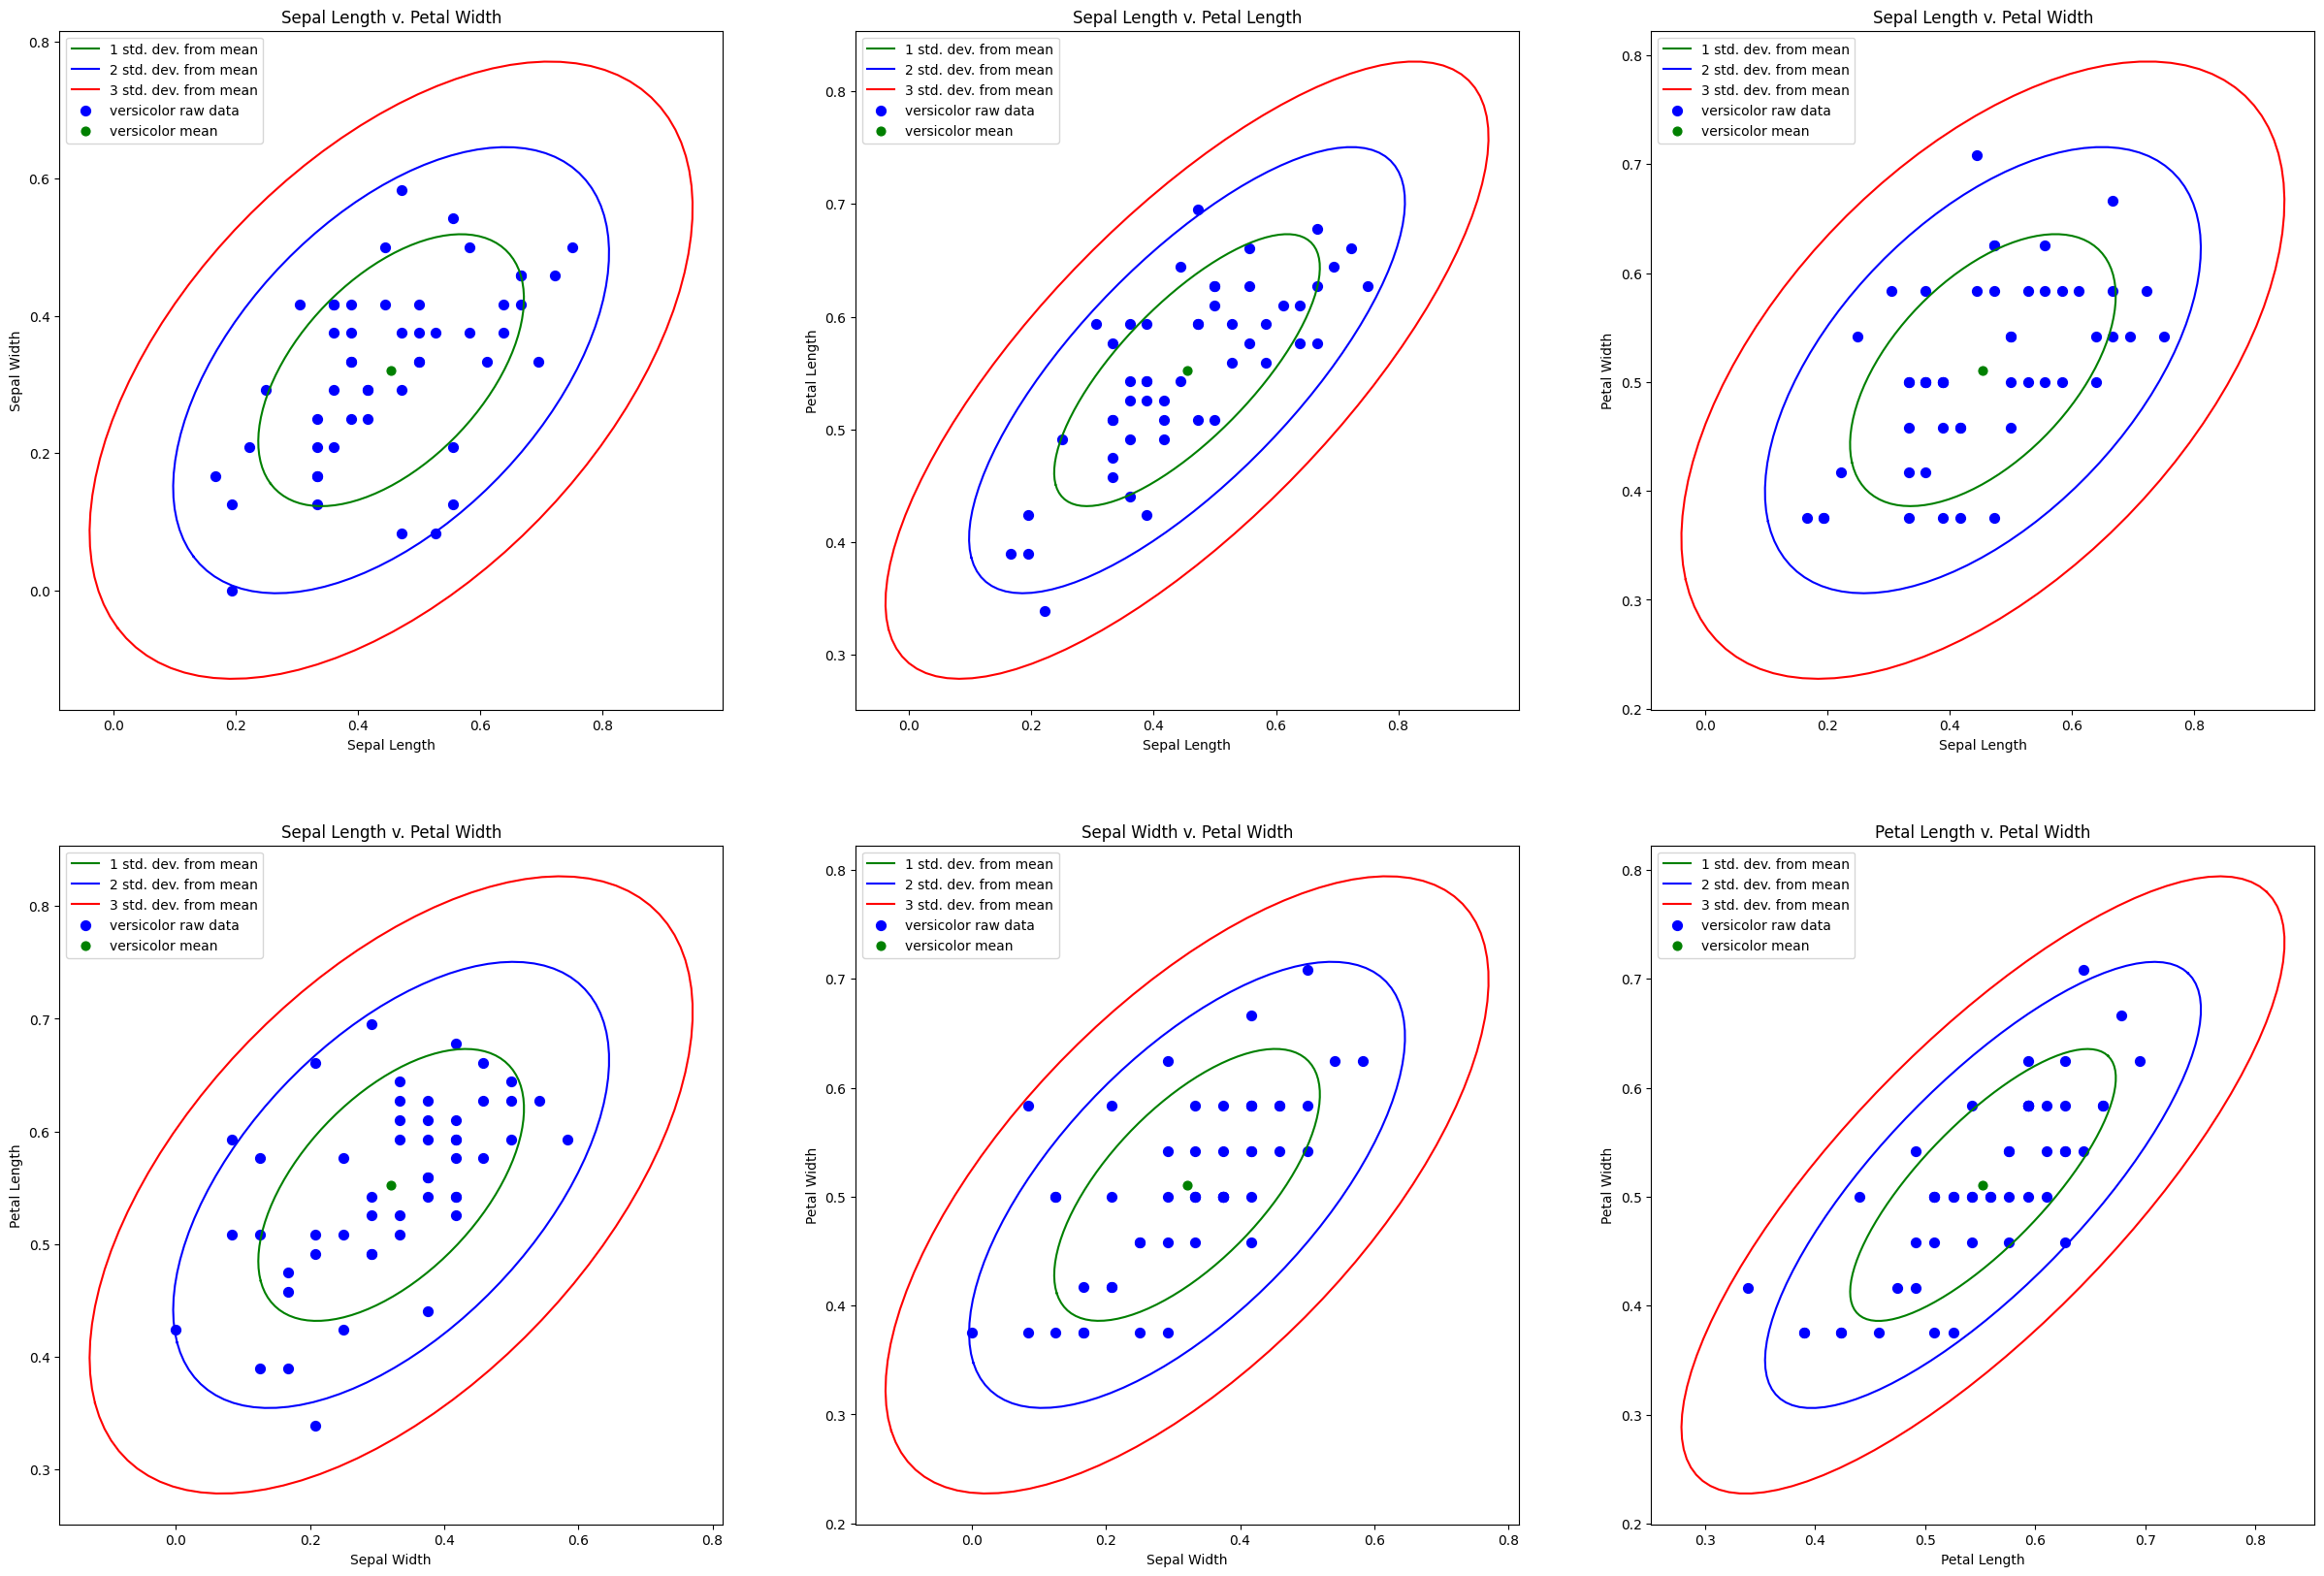

In [212]:
plot_helper(iris_df,"versicolor")

We can see there is potentially outliers in `Sepal Width v. Petal Width` and `Petal Length v. Petal Width` near the middle left and bottom left respectively

#### Virginica Visualization

/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X = self.mean[0]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_Y = self.mean[1]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X =

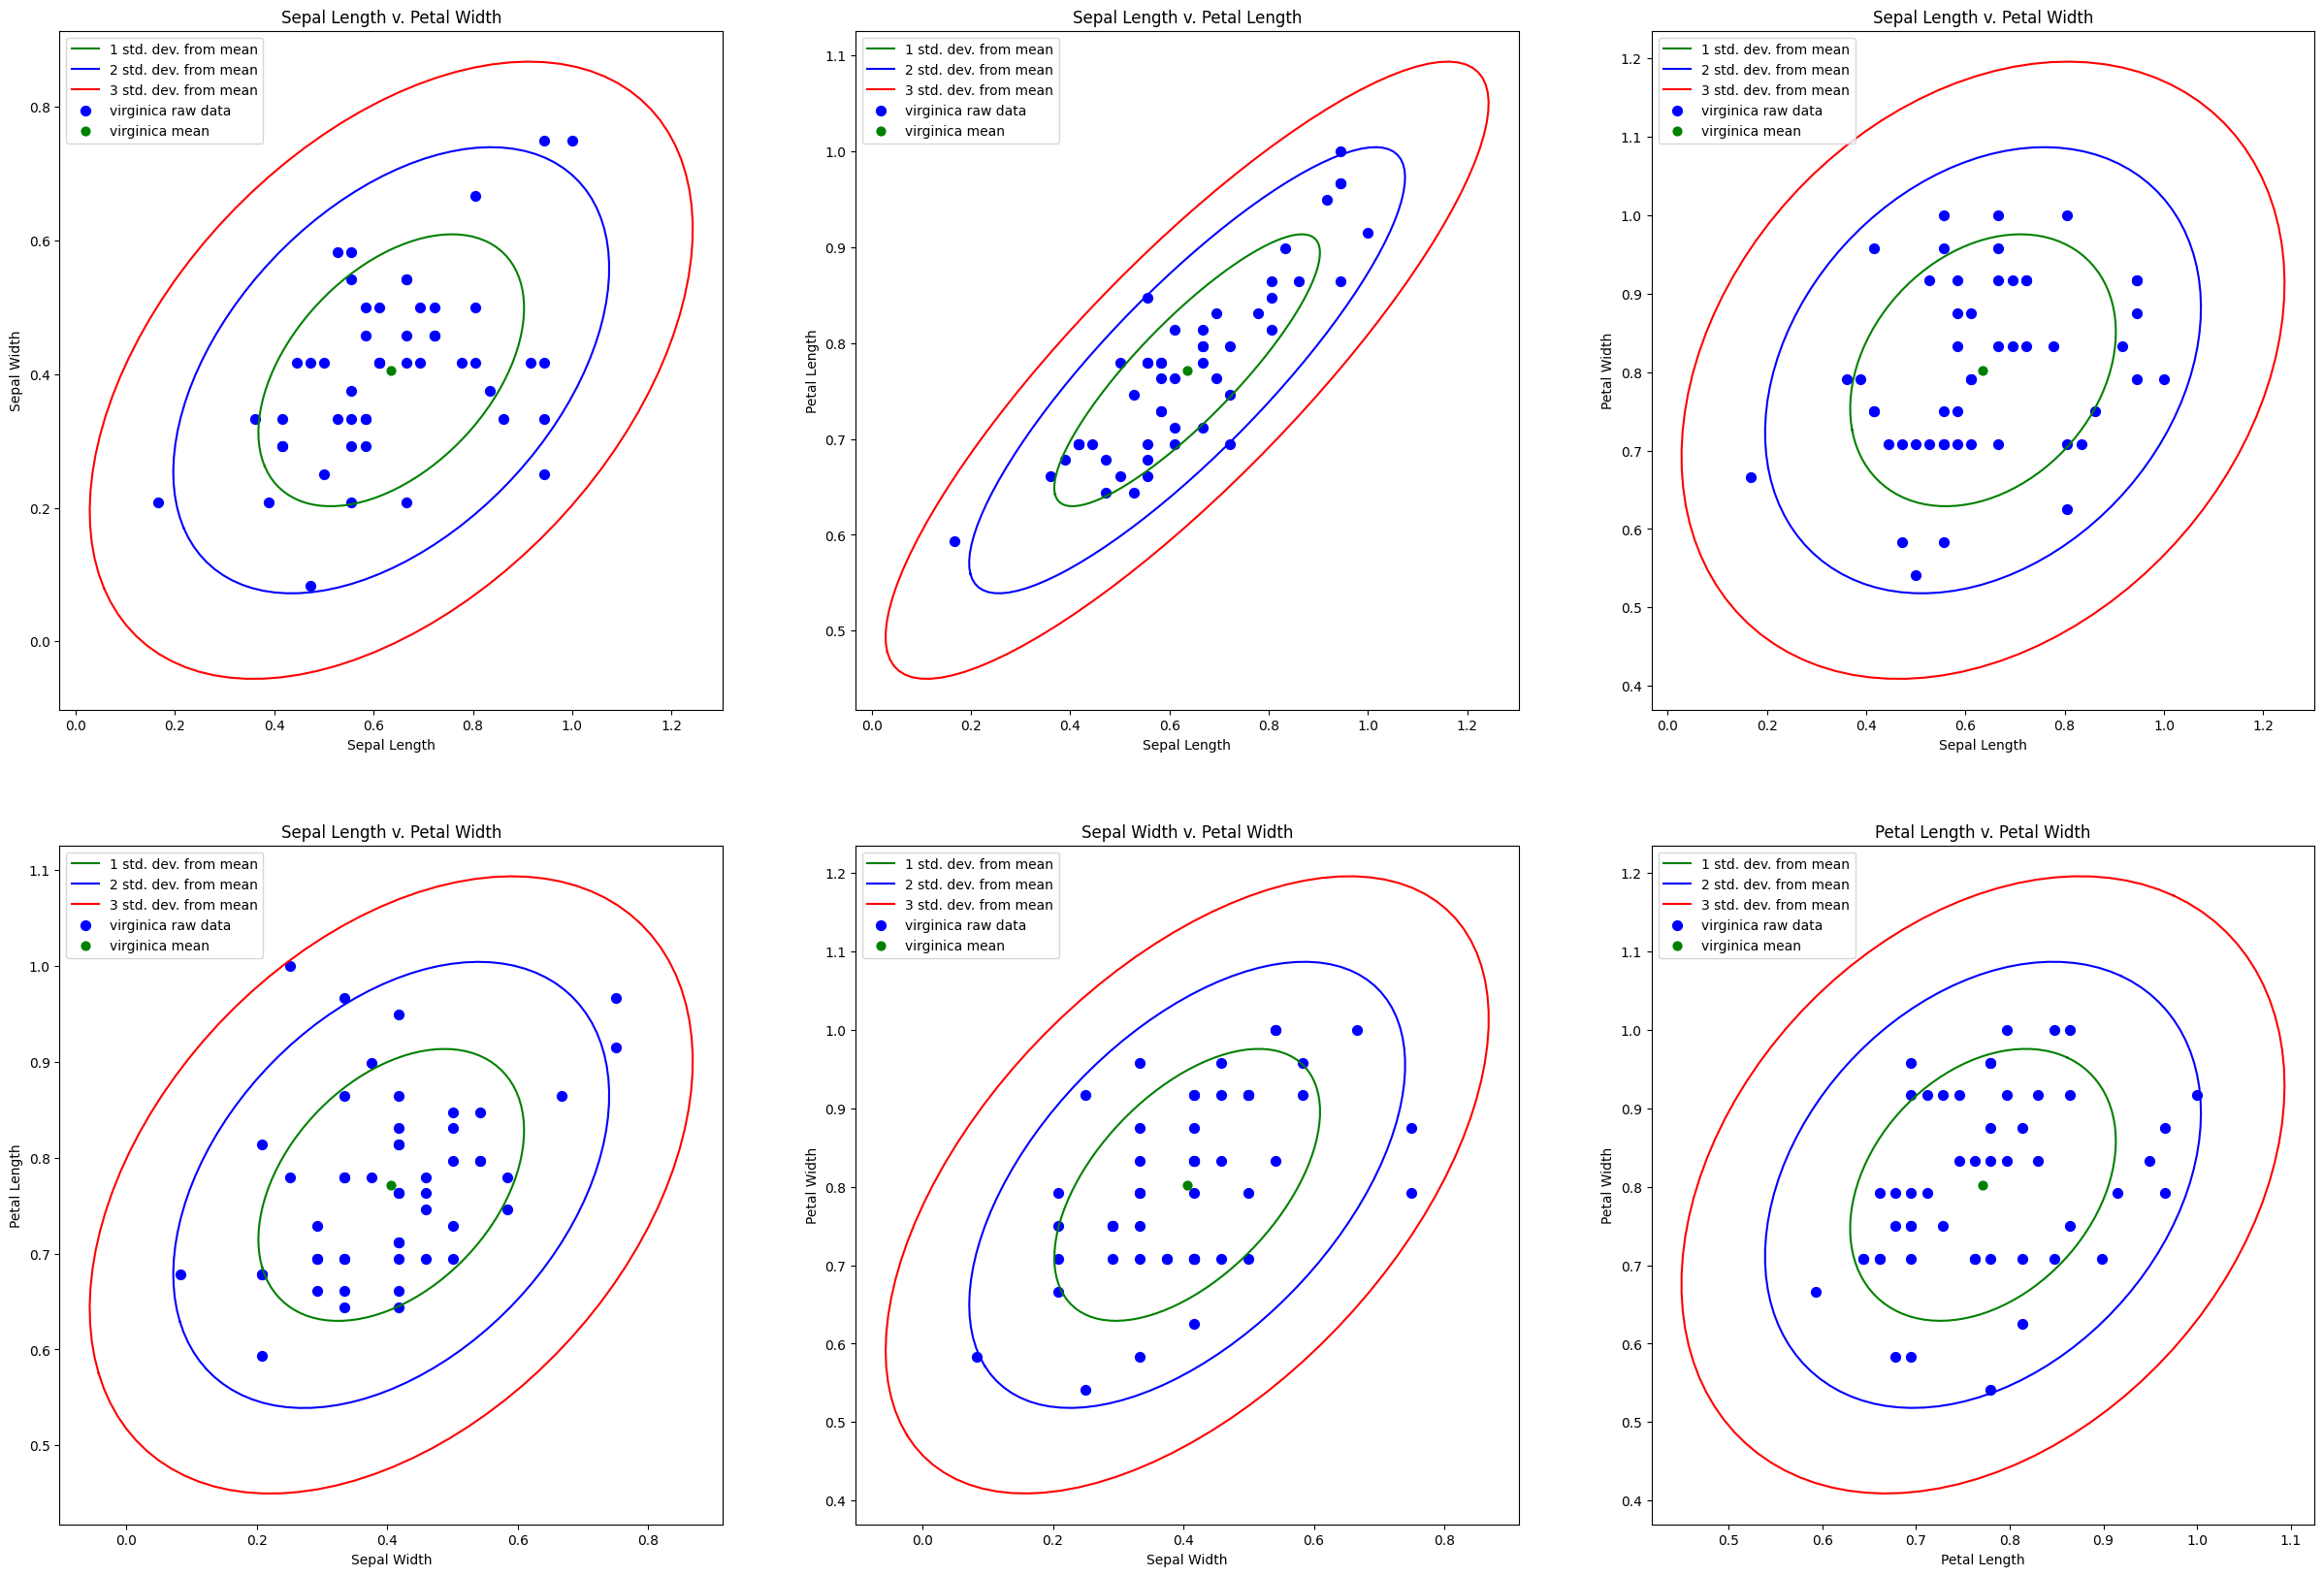

In [213]:
plot_helper(iris_df,"virginica")

Would potentially say that the 

In [214]:
iris_class = iris_df.pop("species")
iris_removed_outliers = outlier_removal(iris_df)
iris_removed_outliers["species"] = iris_class

How many outliers did we catch?

In [215]:
iris_removed_outliers.shape

(141, 5)

Looks like we removed a total of 9 outliers over the 3 classes

In [216]:
iris_df = iris_removed_outliers

#### v.
A. There was some pretty clear outliers in the `setosa` dataset for the `sepal length vs. petal width` plot. There were also several other data points in the `setosa` class, at least one in `versicolor`, and at least one in `virginica`. You can determine outliers based on the plots, each ring represents distance further away from the mean by a standard deviation. 3 standard deviation is outside 95% confidence and can be classified as outliers.
B. The Wilk's Outlier Removal method was used which utilizes the Chi-squared distribution and the mahalanobis distance. The mahalanobis distance is a useful metric that describes how far an observation is relative to the covariance of the entire dataset, including all classes and features.

---
#### e) Feature Ranking

#### i.
The ranking of each of the features can be attributed to the Fisher Discriminant ratio which ranks features based on the mean and covariance 
#### ii.

#### iii.

In [218]:
from itertools import combinations

#citation: inspired by DataProcessing.pdf class notes
def fisher_two_hot(df, classes):
    x1 = df[df["species"] == classes[0]].iloc[:, 0:4].values
    x2 = df[df["species"] == classes[1]].iloc[:, 0:4].values

    mu1 = np.mean(x1)
    mu2 = np.mean(x2)

    sigma1 = np.std(x1)
    sigma2 = np.std(x2)

    fdr = (mu1 - mu2)**2 / (sigma1**2 + sigma2**2)
    print(fdr)
    return fdr

def fisher_discriminant(df, labels):
    x = df.iloc[:,0:4]
    ranking = {} 
    classes = np.unique(labels)
    comb = list(combinations(classes, 2))

    fdr_arr = np.zeros((len(comb), x.shape[1]))

    for idx, i in enumerate(comb):
        #list of class names pairs
        c = list(i)
        fdr_arr[idx, :]  = fisher_two_hot(df, c)

        fdr = np.sum(fdr_arr, axis=0)

        for idx, x in enumerate(np.argsort(fdr)[::-1]):
            ranking[f"feature_{x+1}"] = idx+1
    
    return ranking



In [219]:
df = pd.read_csv("iris.csv")
fisher_discriminant(df, iris_class)

['setosa', 'versicolor']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]
[[7.  3.2 4.7 1.4]
 [6.4

{'feature_4': 1, 'feature_3': 2, 'feature_2': 3, 'feature_1': 4}

---
#### f) Principle Component Analysis

#### i.

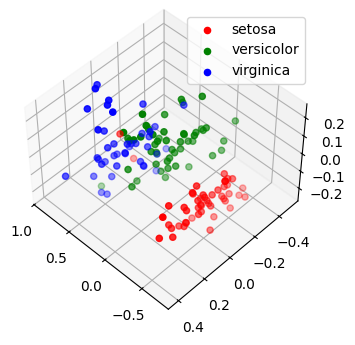

In [245]:
from sklearn import decomposition

x = iris_df.iloc[:, 0:4]
y = iris_df["species"]
# setup PCA for three classes
pca = decomposition.PCA(n_components=3)
pca.fit(x)
x = pca.transform(x)
pca_df = pd.DataFrame(data=x, columns=["x", "y", "z"])
pca_df["species"] = y

fig = plt.figure(1, figsize=(4,3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()

#ax.scatter(x[:, 0], x[:, 1], x[:, 2], edgecolors="k")
#for class_name, color, lab
for class_name, color in zip(["setosa", "versicolor", "virginica"], ["r", "g", "b"]):
    ax.scatter(pca_df[pca_df["species"] == class_name]["x"],
               pca_df[pca_df["species"] == class_name]["y"],
               pca_df[pca_df["species"] == class_name]["z"],
               color=color, label=class_name)

ax.legend()
plt.show()